tensor([[0.2964, 0.2181, 0.1489, 0.1623, 0.1743],
        [0.2713, 0.2026, 0.1621, 0.1508, 0.2132],
        [0.2765, 0.2152, 0.1721, 0.1632, 0.1731],
        [0.2760, 0.1902, 0.1604, 0.1575, 0.2158],
        [0.2601, 0.2480, 0.1276, 0.1927, 0.1715]])


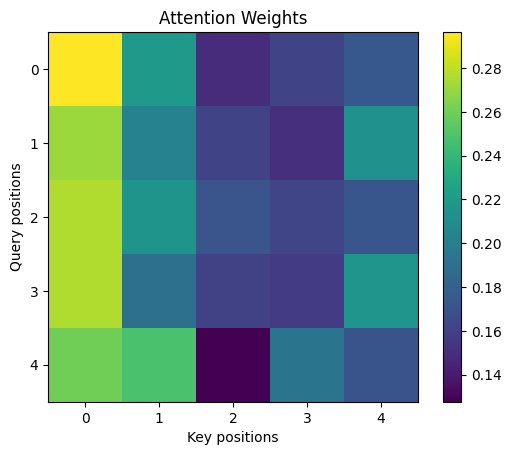

In [ ]:
#1. Scaled Dot-Product Attention
import torch
import torch.nn.functional as F
import math

def scaled_dot_product_attention

(Q, K, V):
    d_k = Q.size(-1)

    # QK^T
    scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)

    # Softmax
    attention_weights = F.softmax(scores, dim=-1)

    # Weighted sum
    output = torch.matmul(attention_weights, V)

    return output, attention_weights
seq_len = 5
d_model = 8

Q = torch.rand(seq_len, d_model)
K = torch.rand(seq_len, d_model)
V = torch.rand(seq_len, d_model)

out, attn = scaled_dot_product_attention(Q, K, V)
print(attn)
import matplotlib.pyplot as plt

plt.imshow(attn.detach(), cmap="viridis")
plt.colorbar()
plt.xlabel("Key positions")
plt.ylabel("Query positions")
plt.title("Attention Weights")
plt.show()


Input shape: torch.Size([1, 5, 8])
Output shape: torch.Size([1, 5, 8])
Attention weights shape: torch.Size([1, 5, 5])


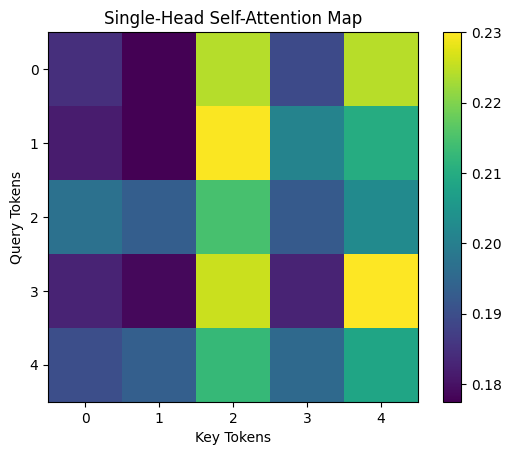

In [6]:
#2.
# Single-Head Self-Attention (From Scratch)
# ALL-IN-ONE PyTorch Code
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
# Single-Head Self-Attention Module
class SingleHeadSelfAttention(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
  def forward(self, x):
    # x shape: (batch_size, seq_len, d_model)

        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)

        d_k = Q.size(-1)

        # Scaled Dot-Product Attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)
        attention_weights = F.softmax(scores, dim=-1)

        output = torch.matmul(attention_weights, V)
        return output, attention_weights
# Test the Implementation
batch_size = 1
seq_len = 5
d_model = 8
# Dummy input embeddings
x = torch.rand(batch_size, seq_len, d_model)
# Initialize attention layer
self_attention = SingleHeadSelfAttention(d_model)

# Forward pass
output, attn_weights = self_attention(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)
print("Attention weights shape:", attn_weights.shape)



# Visualize Attention Weights

plt.imshow(attn_weights[0].detach(), cmap="viridis")
plt.colorbar()
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.title("Single-Head Self-Attention Map")
plt.show()


Input shape: torch.Size([1, 5, 8])
Output shape: torch.Size([1, 5, 8])
Attention weights shape: torch.Size([1, 2, 5, 5])


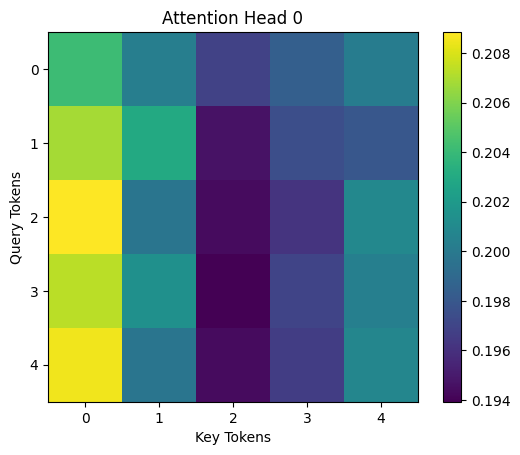

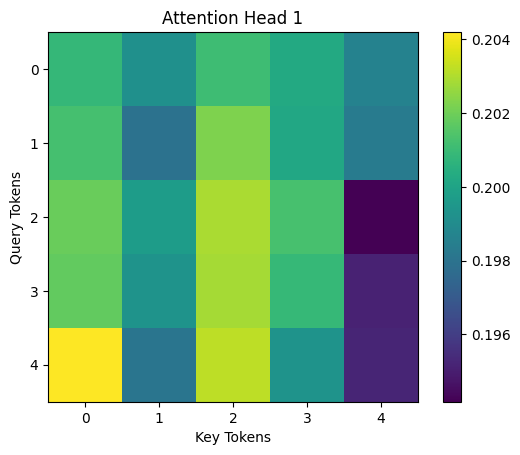

Mean difference between head 0 and head 1: 0.004375922493636608


In [5]:
#3.
# Multi-Head Self-Attention (From Scratch)
# ALL-IN-ONE PyTorch Code


import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt


# Multi-Head Attention Module

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def forward(self, x):
        # x shape: (batch_size, seq_len, d_model)
        B, T, D = x.shape

        # Linear projections
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)

        # Split into heads
        Q = Q.view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.d_k).transpose(1, 2)

        # Scaled Dot-Product Attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attention_weights = F.softmax(scores, dim=-1)
        head_outputs = torch.matmul(attention_weights, V)

        # Concatenate heads
        concat = head_outputs.transpose(1, 2).contiguous().view(B, T, D)

        # Final projection
        output = self.W_o(concat)

        return output, attention_weights



# Test the Model

batch_size = 1
seq_len = 5
d_model = 8
num_heads = 2

# Dummy input
x = torch.rand(batch_size, seq_len, d_model)

# Initialize model
mha = MultiHeadAttention(d_model, num_heads)

# Forward pass
output, attn_weights = mha(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)
print("Attention weights shape:", attn_weights.shape)



# Compare Outputs Across Heads

for h in range(num_heads):
    plt.imshow(attn_weights[0, h].detach(), cmap="viridis")
    plt.colorbar()
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.title(f"Attention Head {h}")
    plt.show()

# Numerical comparison
diff = torch.mean(torch.abs(attn_weights[0, 0] - attn_weights[0, 1]))
print("Mean difference between head 0 and head 1:", diff.item())


Attention shape: torch.Size([1, 4, 4])


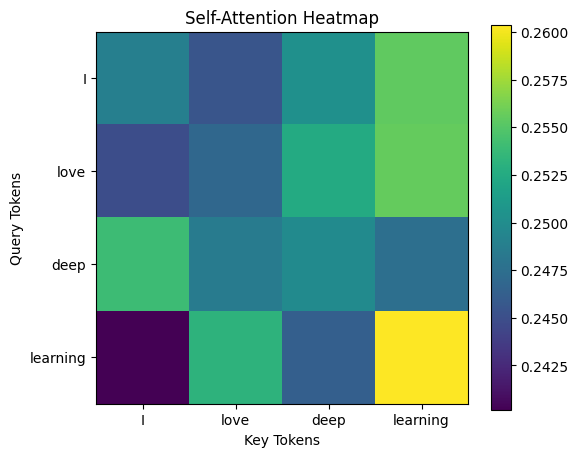

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


<IPython.core.display.Javascript object>

In [8]:
# 4.
# Attention Visualization (Custom)


import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt

# -------------------------------
# Single-Head Self-Attention
# -------------------------------
class SingleHeadSelfAttention(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)

    def forward(self, x):
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)

        d_k = Q.size(-1)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)
        attention_weights = F.softmax(scores, dim=-1)

        output = torch.matmul(attention_weights, V)
        return output, attention_weights


# -------------------------------
# Input Tokens
# -------------------------------
tokens = ["I", "love", "deep", "learning"]
seq_len = len(tokens)
d_model = 8

# Random embeddings
x = torch.rand(1, seq_len, d_model)

# Run Attention
model = SingleHeadSelfAttention(d_model)
output, attn_weights = model(x)

print("Attention shape:", attn_weights.shape)

# -------------------------------
# Visualize Attention Map
# -------------------------------
plt.figure(figsize=(6, 5))
plt.imshow(attn_weights[0].detach(), cmap="viridis")
plt.colorbar()
plt.xticks(range(seq_len), tokens)
plt.yticks(range(seq_len), tokens)
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.title("Self-Attention Heatmap")
plt.show()
!pip install bertviz transformers
# ==========================================
# Attention Visualization using BERTViz
# ==========================================

from transformers import BertTokenizer, BertModel
from bertviz import head_view

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained(
    "bert-base-uncased",
    output_attentions=True
)

# Input sentence
text = "Attention helps models understand context"

# Tokenize
inputs = tokenizer(text, return_tensors="pt")

# Forward pass
outputs = model(**inputs)

# Extract attentions
attentions = outputs.attentions  # tuple: (layers, batch, heads, seq, seq)

# Token list
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

# Visualize
head_view(attentions, tokens)

In [9]:
# 5.
# Head Importance Analysis in Multi-Head Attention


import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import random

# -------------------------------
# Multi-Head Attention
# -------------------------------
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0

        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def forward(self, x, disable_head=None):
        B, T, D = x.shape

        Q = self.W_q(x).view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        K = self.W_k(x).view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        V = self.W_v(x).view(B, T, self.num_heads, self.d_k).transpose(1, 2)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn = F.softmax(scores, dim=-1)

        # 🔥 Disable one attention head (ablation)
        if disable_head is not None:
            attn[:, disable_head] = 0

        out = torch.matmul(attn, V)
        out = out.transpose(1, 2).contiguous().view(B, T, D)

        return self.W_o(out)


# -------------------------------
# Simple Classification Model
# -------------------------------
class SimpleTransformerClassifier(nn.Module):
    def __init__(self, d_model, num_heads, num_classes):
        super().__init__()
        self.attn = MultiHeadAttention(d_model, num_heads)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x, disable_head=None):
        x = self.attn(x, disable_head)
        x = x.mean(dim=1)           # Global average pooling
        return self.fc(x)


# -------------------------------
# Generate Dummy Dataset
# -------------------------------
def generate_data(num_samples=500, seq_len=6, d_model=8):
    X, y = [], []
    for _ in range(num_samples):
        x = torch.rand(seq_len, d_model)
        label = int(x.mean() > 0.5)   # Simple rule
        X.append(x)
        y.append(label)
    return torch.stack(X), torch.tensor(y)


# -------------------------------
# Training Function
# -------------------------------
def train(model, X, y, epochs=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()

    for _ in range(epochs):
        optimizer.zero_grad()
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()


# -------------------------------
# Accuracy Function
# -------------------------------
def accuracy(model, X, y, disable_head=None):
    with torch.no_grad():
        preds = model(X, disable_head)
        predicted = preds.argmax(dim=1)
        return (predicted == y).float().mean().item()


# -------------------------------
# Main Experiment
# -------------------------------
d_model = 8
num_heads = 4
num_classes = 2

X, y = generate_data()

model = SimpleTransformerClassifier(d_model, num_heads, num_classes)

# Train normally
train(model, X, y)

# Baseline accuracy
base_acc = accuracy(model, X, y)
print(f"Baseline Accuracy: {base_acc:.4f}")

# Head Importance Analysis
for h in range(num_heads):
    acc = accuracy(model, X, y, disable_head=h)
    print(f"Accuracy without Head {h}: {acc:.4f} | Drop: {base_acc - acc:.4f}")


Baseline Accuracy: 0.5340
Accuracy without Head 0: 0.5340 | Drop: 0.0000
Accuracy without Head 1: 0.5340 | Drop: 0.0000
Accuracy without Head 2: 0.5340 | Drop: 0.0000
Accuracy without Head 3: 0.5340 | Drop: 0.0000


In [10]:
#6.
# Transformer Encoder Block (From Scratch)
# ==================================================

import torch
import torch.nn as nn
import torch.nn.functional as F
import math


# -------------------------------
# Multi-Head Self-Attention
# -------------------------------
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def forward(self, x):
        # x: (batch_size, seq_len, d_model)
        B, T, D = x.shape

        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)

        # Split into heads
        Q = Q.view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.d_k).transpose(1, 2)

        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn = F.softmax(scores, dim=-1)

        out = torch.matmul(attn, V)

        # Concatenate heads
        out = out.transpose(1, 2).contiguous().view(B, T, D)

        return self.W_o(out)


# -------------------------------
# Transformer Encoder Block
# -------------------------------
class TransformerEncoderBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff):
        super().__init__()

        self.attn = MultiHeadSelfAttention(d_model, num_heads)

        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )

        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        # Multi-head attention + residual + norm
        attn_out = self.attn(x)
        x = self.norm1(x + attn_out)

        # Feed-forward + residual + norm
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)

        return x


# -------------------------------
# Test the Encoder Block
# -------------------------------
batch_size = 1
seq_len = 6
d_model = 8
num_heads = 2
d_ff = 32

x = torch.rand(batch_size, seq_len, d_model)

encoder_block = TransformerEncoderBlock(d_model, num_heads, d_ff)

output = encoder_block(x)

print("Input shape :", x.shape)
print("Output shape:", output.shape)


Input shape : torch.Size([1, 6, 8])
Output shape: torch.Size([1, 6, 8])


Sinusoidal Encoding Shape: torch.Size([1, 10, 8])
Learned Encoding Shape: torch.Size([1, 10, 8])


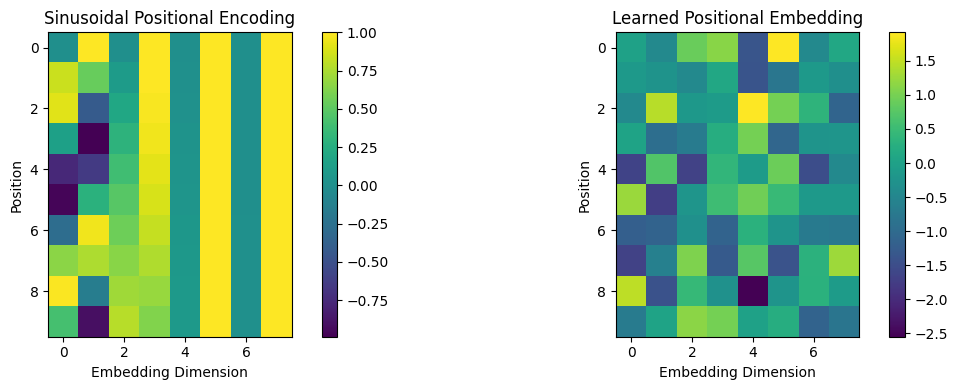

In [11]:
# 7.
# Positional Encoding Experiment
# Sinusoidal vs Learned Positional Embeddings


import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt



# 1. Sinusoidal Positional Encoding

class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=100):
        super().__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)

        div_term = torch.exp(
            torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)
        )

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer("pe", pe)

    def forward(self, x):
        # x shape: (batch_size, seq_len, d_model)
        seq_len = x.size(1)
        return x + self.pe[:seq_len]



# 2. Learned Positional Embedding

class LearnedPositionalEmbedding(nn.Module):
    def __init__(self, d_model, max_len=100):
        super().__init__()
        self.pos_embed = nn.Embedding(max_len, d_model)

    def forward(self, x):
        batch_size, seq_len, d_model = x.shape
        positions = torch.arange(seq_len).unsqueeze(0).repeat(batch_size, 1)
        return x + self.pos_embed(positions)


# 3. Test and Compare

batch_size = 1
seq_len = 10
d_model = 8

# Dummy token embeddings
x = torch.zeros(batch_size, seq_len, d_model)

# Initialize positional encodings
sin_pe = SinusoidalPositionalEncoding(d_model)
learned_pe = LearnedPositionalEmbedding(d_model)

# Apply positional encodings
x_sin = sin_pe(x)
x_learned = learned_pe(x)

print("Sinusoidal Encoding Shape:", x_sin.shape)
print("Learned Encoding Shape:", x_learned.shape)



# 4. Visualization

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_sin[0].detach(), cmap="viridis")
plt.title("Sinusoidal Positional Encoding")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(x_learned[0].detach(), cmap="viridis")
plt.title("Learned Positional Embedding")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar()

plt.tight_layout()
plt.show()
